<h1>Greenhouse Gas Emissions in NZ from 2007-2019</h1>
Data from: https://www.stats.govt.nz/large-datasets/csv-files-for-download/


*note: Not every section/industry is used in this file

<h2> Move the csv into a pandas dataframe </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

local_path = '../data/'
filename = local_path + 'Greenhouse-gas.csv'
print("Working with file: " + filename)
df=pd.read_csv(filename)
df

Working with file: ../data/Greenhouse-gas.csv


,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
0,2007,AA1,NaN,Agriculture,Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2849.43
1,2007,AA1,NaN,Agriculture,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,41032.20
2,2007,AA1,NaN,Agriculture,Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,31157.61
3,2007,AA1,NaN,Agriculture,Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,7023.04
4,2007,AA1,NaN,Agriculture,Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2.12
...,...,...,...,...,...,...,...,...,...,...
19082,2019,ZZZ,NaN,Total,Total,Methane,Tonnes,Carbon dioxide equivalents,Environmental accounts,34620291.18
19083,2019,ZZZ,NaN,Total,Total,Hydrofluorocarbons,Tonnes,Carbon dioxide equivalents,Environmental accounts,1729944.53
19084,2019,ZZZ,NaN,Total,Total,Sulphur hexafluoride,Tonnes,Carbon dioxide equivalents,Environmental accounts,15708.22
19085,2019,ZZZ,NaN,Total,Total,Perfluorocarbons,Tonnes,Carbon dioxide equivalents,Environmental accounts,89131.61


<h2>Section to look at Agriculture</h2>

In [3]:
# Specifically looking at agriculture
agriculture = df.query('anzsic_descriptor == "Agriculture"')
agriculture

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
0,2007,AA1,NaN,Agriculture,Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2849.43
1,2007,AA1,NaN,Agriculture,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,41032.20
2,2007,AA1,NaN,Agriculture,Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,31157.61
3,2007,AA1,NaN,Agriculture,Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,7023.04
4,2007,AA1,NaN,Agriculture,Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2.12
...,...,...,...,...,...,...,...,...,...,...
294,2019,AA1,NaN,Agriculture,Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,41832512.55
295,2019,AA1,NaN,Agriculture,Total,Nitrous oxide,Tonnes,Carbon dioxide equivalents,Environmental accounts,7897892.63
296,2019,AA1,NaN,Agriculture,Total,Methane,Tonnes,Carbon dioxide equivalents,Environmental accounts,31244841.83
297,2019,AA1,NaN,Agriculture,Total,Hydrofluorocarbons,Tonnes,Carbon dioxide equivalents,Environmental accounts,2991.79


In [4]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = agriculture.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_agr = 0

for i in range(0, len(methane_array)):
    methane_total_agr += methane_array[i]


co2ql = agriculture.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_agr = 0

for i in range(0, len(co2_array)):
    co2_total_agr += co2_array[i]

nitrousql = agriculture.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_agr = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_agr += nitrous_array[i]

fluoroql = agriculture.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_agr = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_agr += fluoro_array[i]

gasql = agriculture.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_agr = 0

for i in range(0, len(gas_array)):
    gas_total_agr += gas_array[i]

<h2>Visualize it</h2>

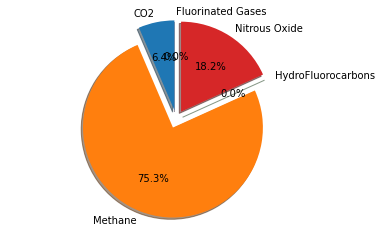

In [5]:
# Pie Chart
labels = 'CO2', 'Methane', 'HydroFluorocarbons', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_agr, methane_total_agr, fluoro_total_agr, nitrous_total_agr, gas_total_agr]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

<h2>Section for Forestry and Logging</h2>

In [6]:
# Specifically looking at Forestry
forestry = df.query('anzsic_descriptor == "Forestry and logging"')
forestry

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
1079,2007,AA2,NaN,Forestry and logging,Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,218.87
1080,2007,AA2,NaN,Forestry and logging,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,405.44
1081,2007,AA2,NaN,Forestry and logging,Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,149.25
1082,2007,AA2,NaN,Forestry and logging,Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,36.75
1083,2007,AA2,NaN,Forestry and logging,Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,0.57
...,...,...,...,...,...,...,...,...,...,...
1412,2018,AA2,AA211,Forestry and logging,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,1118.00
1413,2018,AA2,AA211,Forestry and logging,Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,453125.38
1414,2019,AA2,AA211,Forestry and logging,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,456.76
1415,2019,AA2,AA211,Forestry and logging,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,1127.00


In [7]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = forestry.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_for = 0

for i in range(0, len(methane_array)):
    methane_total_for += methane_array[i]


co2ql = forestry.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_for = 0

for i in range(0, len(co2_array)):
    co2_total_for += co2_array[i]

nitrousql = forestry.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_for = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_for += nitrous_array[i]

fluoroql = forestry.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_for = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_for += fluoro_array[i]

gasql = forestry.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_for = 0

for i in range(0, len(gas_array)):
    gas_total_for += gas_array[i]

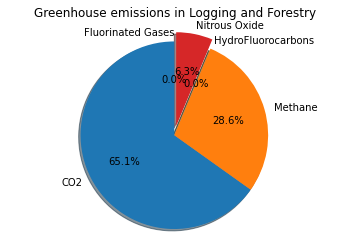

In [8]:
# Pie Chart
labels = 'CO2', 'Methane', 'HydroFluorocarbons', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_for, methane_total_for, fluoro_total_for, nitrous_total_for, gas_total_for]
explode = (0, 0, 0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("Greenhouse emissions in Logging and Forestry")
plt.show()

<h2>Section for Fishing and Aquaculture</h2>

In [9]:
fishing = df.query("anzsic == 'AA3'")
aquaculture = df.query("anzsic_descriptor == 'Aquaculture'")
fishing

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
1417,2007,AA3,NaN,"Fishing, aquaculture and agriculture, forestry...",Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,509.27
1418,2007,AA3,NaN,"Fishing, aquaculture and agriculture, forestry...",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,515.91
1419,2007,AA3,NaN,"Fishing, aquaculture and agriculture, forestry...",Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,0.69
1420,2007,AA3,NaN,"Fishing, aquaculture and agriculture, forestry...",Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,4.87
1421,2007,AA3,NaN,"Fishing, aquaculture and agriculture, forestry...",Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,1.08
...,...,...,...,...,...,...,...,...,...,...
1867,2018,AA3,AA322,"Agriculture, forestry and fishing support serv...",Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,2447.00
1868,2018,AA3,AA322,"Agriculture, forestry and fishing support serv...",Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,424519.59
1869,2019,AA3,AA322,"Agriculture, forestry and fishing support serv...",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,436.75
1870,2019,AA3,AA322,"Agriculture, forestry and fishing support serv...",Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,2518.00


<h2>Section for Mining</h2>

In [10]:
mining = df.query('anzsic == "BB1"')
mining

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
2171,2007,BB1,NaN,Mining,Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,1573.34
2172,2007,BB1,NaN,Mining,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2034.23
2173,2007,BB1,NaN,Mining,Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,455.30
2174,2007,BB1,NaN,Mining,Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,4.49
2175,2007,BB1,NaN,Mining,Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,1.10
...,...,...,...,...,...,...,...,...,...,...
2621,2018,BB1,BB114,Exploration and other mining support services,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,81.00
2622,2018,BB1,BB114,Exploration and other mining support services,Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,7931.42
2623,2019,BB1,BB114,Exploration and other mining support services,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,8.44
2624,2019,BB1,BB114,Exploration and other mining support services,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,87.00


In [11]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = mining.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_min = 0

for i in range(0, len(methane_array)):
    methane_total_min += methane_array[i]


co2ql = mining.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_min = 0

for i in range(0, len(co2_array)):
    co2_total_min += co2_array[i]

nitrousql = mining.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_min = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_min += nitrous_array[i]

fluoroql = mining.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_min = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_min += fluoro_array[i]

gasql = mining.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_min = 0

for i in range(0, len(gas_array)):
    gas_total_min += gas_array[i]

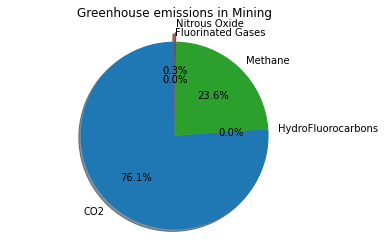

In [12]:
# Pie Chart
labels = 'CO2','HydroFluorocarbons', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_min, fluoro_total_min, methane_total_min, nitrous_total_min, gas_total_min]
explode = (0, 0, 0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("Greenhouse emissions in Mining")
plt.show()

<h2>Section for Food and Beverage industry</h2>

In [13]:
bev = df.query('anzsic == "CC1"')
bev

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
3224,2007,CC1,NaN,"Food, beverage, and tobacco product manufacturing",Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2279.16
3225,2007,CC1,NaN,"Food, beverage, and tobacco product manufacturing",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2661.30
3226,2007,CC1,NaN,"Food, beverage, and tobacco product manufacturing",Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,69.71
3227,2007,CC1,NaN,"Food, beverage, and tobacco product manufacturing",Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,14.59
3228,2007,CC1,NaN,"Food, beverage, and tobacco product manufacturing",Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,297.84
...,...,...,...,...,...,...,...,...,...,...
3713,2018,CC1,CC151,Beverage and tobacco product manufacturing,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,311.00
3714,2018,CC1,CC151,Beverage and tobacco product manufacturing,Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,28418.68
3715,2019,CC1,CC151,Beverage and tobacco product manufacturing,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,29.36
3716,2019,CC1,CC151,Beverage and tobacco product manufacturing,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,321.00


In [14]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = bev.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_bev = 0

for i in range(0, len(methane_array)):
    methane_total_bev += methane_array[i]


co2ql = bev.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_bev = 0

for i in range(0, len(co2_array)):
    co2_total_bev += co2_array[i]

nitrousql = bev.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_bev = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_bev += nitrous_array[i]

fluoroql = mining.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_bev = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_bev += fluoro_array[i]

gasql = bev.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_bev = 0

for i in range(0, len(gas_array)):
    gas_total_bev += gas_array[i]

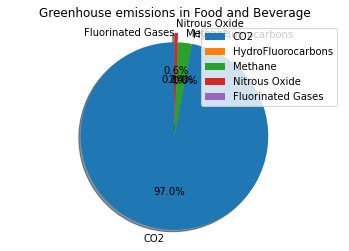

In [15]:
# Pie Chart
labels = 'CO2','HydroFluorocarbons', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_bev, fluoro_total_bev, methane_total_bev, nitrous_total_bev, gas_total_bev]
explode = (0, 0, 0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend()
plt.title("Greenhouse emissions in Food and Beverage")
plt.show()

<h2>Section for textile and clothing industry</h2>

In [16]:
cloth = df.query('anzsic == "CC2"')
cloth

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
3718,2007,CC2,NaN,"Textile, leather, clothing, and footwear manuf...",Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,93.58
3719,2007,CC2,NaN,"Textile, leather, clothing, and footwear manuf...",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,100.76
3720,2007,CC2,NaN,"Textile, leather, clothing, and footwear manuf...",Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,0.84
3721,2007,CC2,NaN,"Textile, leather, clothing, and footwear manuf...",Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,6.17
3722,2007,CC2,NaN,"Textile, leather, clothing, and footwear manuf...",Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,0.18
...,...,...,...,...,...,...,...,...,...,...
4090,2018,CC2,CC212,"Clothing, knitted products and footwear manufa...",Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,570.00
4091,2018,CC2,CC212,"Clothing, knitted products and footwear manufa...",Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,6289.52
4092,2019,CC2,CC212,"Clothing, knitted products and footwear manufa...",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,6.94
4093,2019,CC2,CC212,"Clothing, knitted products and footwear manufa...",Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,629.00


In [17]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = cloth.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_cloth = 0

for i in range(0, len(methane_array)):
    methane_total_cloth += methane_array[i]


co2ql = cloth.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_cloth = 0

for i in range(0, len(co2_array)):
    co2_total_cloth += co2_array[i]

nitrousql = cloth.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_cloth = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_cloth += nitrous_array[i]

fluoroql = cloth.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_cloth = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_cloth += fluoro_array[i]

gasql = cloth.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_cloth = 0

for i in range(0, len(gas_array)):
    gas_total_cloth += gas_array[i]

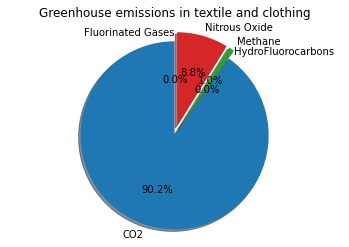

In [18]:
# Pie Chart
labels = 'CO2','HydroFluorocarbons', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_cloth, fluoro_total_cloth, methane_total_cloth, nitrous_total_cloth, gas_total_cloth]
explode = (0, 0, 0.1, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("Greenhouse emissions in textile and clothing")
plt.show()

<h2>Section for Gas and Chemicals</h2>

In [19]:
chem = df.query('anzsic == "CC5"')
chem

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
4212,2007,CC5,NaN,"Petroleum, chemical, polymer, and rubber produ...",Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,1704.06
4213,2007,CC5,NaN,"Petroleum, chemical, polymer, and rubber produ...",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,1735.62
4214,2007,CC5,NaN,"Petroleum, chemical, polymer, and rubber produ...",Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,28.99
4215,2007,CC5,NaN,"Petroleum, chemical, polymer, and rubber produ...",Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,1.81
4216,2007,CC5,NaN,"Petroleum, chemical, polymer, and rubber produ...",Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,0.76
...,...,...,...,...,...,...,...,...,...,...
4701,2018,CC5,CC531,Polymer product and rubber product manufacturing,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,694.00
4702,2018,CC5,CC531,Polymer product and rubber product manufacturing,Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,13122.73
4703,2019,CC5,CC531,Polymer product and rubber product manufacturing,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,13.05
4704,2019,CC5,CC531,Polymer product and rubber product manufacturing,Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,690.00


In [20]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = chem.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_chem = 0

for i in range(0, len(methane_array)):
    methane_total_chem += methane_array[i]


co2ql = chem.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_chem = 0

for i in range(0, len(co2_array)):
    co2_total_chem += co2_array[i]

nitrousql = chem.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_chem = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_chem += nitrous_array[i]

fluoroql = chem.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_chem = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_chem += fluoro_array[i]

gasql = chem.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_chem = 0

for i in range(0, len(gas_array)):
    gas_total_chem += gas_array[i]

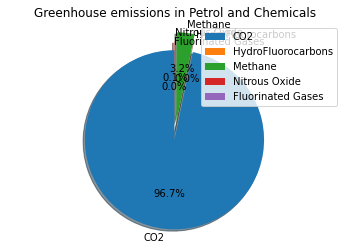

In [21]:
# Pie Chart
labels = 'CO2','HydroFluorocarbons', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_chem, fluoro_total_chem, methane_total_chem, nitrous_total_chem, gas_total_chem]
explode = (0, 0.1, 0.2, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend()
plt.title("Greenhouse emissions in Petrol and Chemicals")
plt.show()

<h2>Section for Electricity, gas, water, and waste</h2>

In [22]:
water = df.query('anzsic == "DD1"')
water

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
6617,2007,DD1,NaN,"Electricity, gas, water, and waste services",Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,7588.66
6618,2007,DD1,NaN,"Electricity, gas, water, and waste services",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,11074.07
6619,2007,DD1,NaN,"Electricity, gas, water, and waste services",Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,3285.61
6620,2007,DD1,NaN,"Electricity, gas, water, and waste services",Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,106.71
6621,2007,DD1,NaN,"Electricity, gas, water, and waste services",Total,Sulphur hexafluoride,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,15.37
...,...,...,...,...,...,...,...,...,...,...
7496,2018,DD1,DD123,"Waste collection, treatment and disposal services",Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,929.00
7497,2018,DD1,DD123,"Waste collection, treatment and disposal services",Total,Carbon dioxide equivalents,Tonnes,Carbon dioxide equivalents,Environmental accounts,2829020.82
7498,2019,DD1,DD123,"Waste collection, treatment and disposal services",Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,2768.50
7499,2019,DD1,DD123,"Waste collection, treatment and disposal services",Total,Carbon dioxide equivalents,Index,Actual,Environmental accounts,910.00


In [23]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = water.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_water = 0

for i in range(0, len(methane_array)):
    methane_total_water += methane_array[i]


co2ql = water.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_water = 0

for i in range(0, len(co2_array)):
    co2_total_water += co2_array[i]

nitrousql = water.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_water = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_water += nitrous_array[i]

fluoroql = water.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_water = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_water += fluoro_array[i]

gasql = water.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_water = 0

for i in range(0, len(gas_array)):
    gas_total_water += gas_array[i]

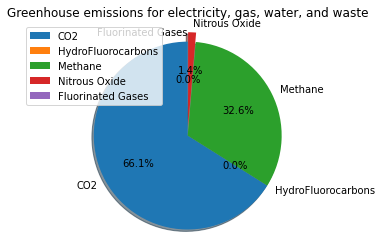

In [31]:
# Pie Chart
labels = 'CO2','HydroFluorocarbons', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_water, fluoro_total_water, methane_total_water, nitrous_total_water, gas_total_water]
explode = (0, 0, 0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend()
plt.title("Greenhouse emissions for electricity, gas, water, and waste")
plt.show()

<h2>Household Emissions</h2>

In [25]:
house = df.query("anzsic == 'HHD'")
house

,year,anzsic,anzwi,anzsic_descriptor,category,variable,units,magnitude,source,data_value
9579,2007,HHD,NaN,Households,Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,8324.40
9580,2007,HHD,NaN,Households,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,8738.37
9581,2007,HHD,NaN,Households,Total,Methane,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,159.82
9582,2007,HHD,NaN,Households,Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,128.66
9583,2007,HHD,NaN,Households,Total,Hydrofluorocarbons,Kilotonnes,Carbon dioxide equivalents,Environmental accounts,125.49
...,...,...,...,...,...,...,...,...,...,...
10393,2019,HHD,NaN,Households,Transport,Methane,Tonnes,Carbon dioxide equivalents,Environmental accounts,14640.44
10394,2019,HHD,NaN,Households,Transport,Hydrofluorocarbons,Tonnes,Carbon dioxide equivalents,Environmental accounts,0.00
10395,2019,HHD,NaN,Households,Transport,Sulphur hexafluoride,Tonnes,Carbon dioxide equivalents,Environmental accounts,0.00
10396,2019,HHD,NaN,Households,Transport,Perfluorocarbons,Tonnes,Carbon dioxide equivalents,Environmental accounts,0.00


In [26]:
# splitting it into different lists
# put the emissions into separate lists
methaneql = house.query('variable == "Methane" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
methane = methaneql['data_value']

# Move values to arrays and find total emissions for each GHG
methane_array = methane.to_numpy()
methane_total_house = 0

for i in range(0, len(methane_array)):
    methane_total_house += methane_array[i]


co2ql = house.query('variable == "Carbon dioxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
co2 = co2ql['data_value']
co2_array = co2.to_numpy()
co2_total_house = 0

for i in range(0, len(co2_array)):
    co2_total_house += co2_array[i]

nitrousql = house.query('variable == "Nitrous oxide" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
nitrous = nitrousql['data_value']
nitrous_array = nitrous.to_numpy()
nitrous_total_house = 0

for i in range(0, len(nitrous_array)):
    nitrous_total_house += nitrous_array[i]

fluoroql = house.query('variable == "HydroFluorocarbons" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
fluoro = fluoroql['data_value']
fluoro_array = fluoro.to_numpy()
fluoro_total_house = 0

for i in range(0, len(fluoro_array)):
    fluoro_total_house += fluoro_array[i]

gasql = house.query('variable == "Fluoronated gases" and units == "Kilotonnes" and magnitude == "Carbon dioxide equivalents"')
gas = gasql['data_value']
gas_array = gas.to_numpy()
gas_total_house = 0

for i in range(0, len(gas_array)):
    gas_total_house += gas_array[i]

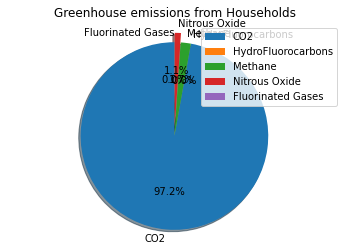

In [30]:
# Pie Chart
labels = 'CO2','HydroFluorocarbons', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases'
sizes = [co2_total_house, fluoro_total_house, methane_total_house, nitrous_total_house, gas_total_house]
explode = (0, 0, 0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend()
plt.title("Greenhouse emissions from Households")
plt.show()

<h2>Total Emissions by Industry and GHG</h2>

<h3>CO2</h3>

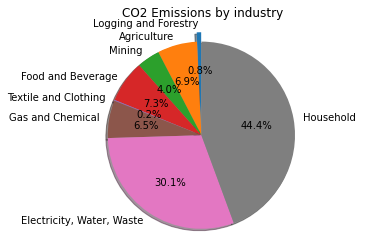

In [28]:
# Pie Chart
labels = 'Logging and Forestry','Agriculture', 'Mining', 'Food and Beverage', 'Textile and Clothing', 'Gas and Chemical', 'Electricity, Water, Waste', 'Household'
sizes = [co2_total_for, co2_total_agr, co2_total_min, co2_total_bev, co2_total_cloth, co2_total_chem, co2_total_water, co2_total_house]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("CO2 Emissions by industry")
plt.show()

<h3>Methane</h3>

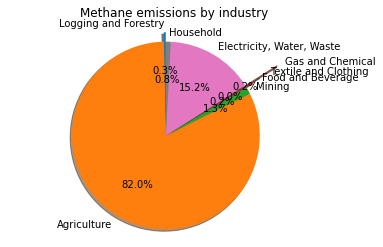

In [29]:
# Pie Chart
labels = 'Logging and Forestry','Agriculture', 'Mining', 'Food and Beverage', 'Textile and Clothing', 'Gas and Chemical', 'Electricity, Water, Waste', 'Household'
sizes = [methane_total_for, methane_total_agr, methane_total_min, methane_total_bev, methane_total_cloth, methane_total_chem, methane_total_water, methane_total_house]
explode = (0.1, 0, 0, 0.1, 0.2, 0.4, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("Methane emissions by industry")
plt.show()